In [48]:
# Read the dataset
import pandas as pd
import numpy as np
dataset = pd.read_csv("/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/data/artifact/2024-03-19-14-47-58/data_processing/processed_data.csv")

In [49]:
data_train = pd.DataFrame(dataset['Close'][0:int(len(dataset)*0.70)])
data_test = pd.DataFrame(dataset['Close'][int(len(dataset)*0.70):int(len(dataset))])

In [50]:
data_train.shape

(1726, 1)

In [51]:
data_test.shape

(740, 1)

In [52]:
data_train.head()

,Close
0,377.323730
1,372.758759
2,382.035950
3,384.343048
4,383.704926


In [53]:
data_test.head()

,Close
1726,306.444885
1727,293.535156
1728,284.662781
1729,295.479065
1730,296.127045


In [54]:
from sklearn.preprocessing import MinMaxScaler

In [55]:
scaler = MinMaxScaler(feature_range=(0,1))

In [56]:
data_train_arr = scaler.fit_transform(data_train)
data_train_arr.shape

(1726, 1)

In [57]:
x_train = []
y_train = []

In [58]:
for i in range(50, data_train_arr.shape[0]):
    x_train.append(data_train_arr[i-50:i])
    y_train.append(data_train_arr[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)

In [59]:
# ML model
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [60]:
model = Sequential()

In [61]:
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

In [62]:
model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

In [63]:
model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

In [64]:
model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

In [65]:
model.add(Dense(units=1))

In [66]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 50, 50)            10400     
                                                                 
 dropout_4 (Dropout)         (None, 50, 50)            0         
                                                                 
 lstm_5 (LSTM)               (None, 50, 60)            26640     
                                                                 
 dropout_5 (Dropout)         (None, 50, 60)            0         
                                                                 
 lstm_6 (LSTM)               (None, 50, 80)            45120     
                                                                 
 dropout_6 (Dropout)         (None, 50, 80)            0         
                                                                 
 lstm_7 (LSTM)               (None, 120)              

In [67]:
model.compile(optimizer="adam", loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50) 

Epoch 1/50
53/53 [==============================] - 4s 56ms/step - loss: 0.0609
Epoch 2/50
53/53 [==============================] - 3s 57ms/step - loss: 0.0126
Epoch 3/50
53/53 [==============================] - 3s 64ms/step - loss: 0.0115
Epoch 4/50
53/53 [==============================] - 3s 64ms/step - loss: 0.0109
Epoch 5/50
53/53 [==============================] - 3s 60ms/step - loss: 0.0095
Epoch 6/50
53/53 [==============================] - 3s 62ms/step - loss: 0.0099
Epoch 7/50
53/53 [==============================] - 3s 60ms/step - loss: 0.0089
Epoch 8/50
53/53 [==============================] - 4s 70ms/step - loss: 0.0077
Epoch 9/50
53/53 [==============================] - 3s 66ms/step - loss: 0.0081
Epoch 10/50
53/53 [==============================] - 4s 69ms/step - loss: 0.0073
Epoch 11/50
53/53 [==============================] - 4s 67ms/step - loss: 0.0068
Epoch 12/50
53/53 [==============================] - 3s 61ms/step - loss: 0.0077
Epoch 13/50
53/53 [==================

In [68]:
model.save("keras_model.h5")

/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [69]:
past_100_days = data_train.tail(100)

In [70]:
final_df = pd.concat([past_100_days, data_test], ignore_index=True)

In [71]:
final_df.head()

,Close
0,134.381180
1,131.490173
2,132.237854
3,132.437241
4,133.683350


In [72]:
input_data = scaler.fit_transform(final_df)

In [73]:
input_data

array([[3.18459465e-03],
       [0.00000000e+00],
       [8.23609309e-04],
       [1.04324406e-03],
       [2.41589823e-03],
       [4.39252695e-03],
       [6.31425960e-03],
       [7.79673954e-03],
       [9.99298621e-03],
       [1.54836365e-02],
       [2.09193739e-02],
       [2.11939047e-02],
       [1.58679931e-02],
       [1.86133183e-02],
       [2.86612005e-02],
       [4.56822131e-02],
       [3.95875882e-02],
       [4.08504502e-02],
       [4.26074442e-02],
       [4.40899242e-02],
       [4.34310367e-02],
       [4.59567439e-02],
       [5.32044050e-02],
       [5.25455175e-02],
       [5.67733226e-02],
       [5.81459936e-02],
       [5.73772804e-02],
       [5.67184097e-02],
       [5.47966939e-02],
       [5.57849914e-02],
       [5.01845490e-02],
       [5.15572032e-02],
       [5.02394451e-02],
       [5.16120992e-02],
       [5.56202864e-02],
       [5.46868681e-02],
       [5.34240229e-02],
       [3.58539487e-02],
       [3.62932014e-02],
       [4.09602424e-02],


In [74]:
input_data.shape

(840, 1)

In [75]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i, 0])

In [76]:
x_test, y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(740, 100, 1)
(740,)


In [77]:
# Making Predictions
y_predicted = model.predict(x_test)

ValueError: in user code:

    File "/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2440, in predict_function  *
        return step_function(self, iterator)
    File "/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2425, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2413, in run_step  **
        outputs = model.predict_step(data)
    File "/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/training.py", line 2381, in predict_step
        return self(x, training=False)
    File "/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Users/vambat1/Documents/Projects/Machine-Learning/05-Stock-Trend-Prediction/venv/lib/python3.11/site-packages/keras/src/engine/input_spec.py", line 298, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential_1" is incompatible with the layer: expected shape=(None, 50, 1), found shape=(None, 100, 1)


In [ ]:
y_predicted.shape

NameError: name 'y_predicted' is not defined

In [ ]:
y_test

array([0.19272175, 0.17850101, 0.16872763, 0.18064233, 0.18135611,
       0.18657225, 0.19310613, 0.19014117, 0.19310613, 0.19316102,
       0.19991455, 0.20458159, 0.16982575, 0.1877253 , 0.18843905,
       0.19557692, 0.18613298, 0.18245424, 0.17861081, 0.17800685,
       0.17954421, 0.18624281, 0.19107457, 0.18668204, 0.17784213,
       0.17690872, 0.17301036, 0.17526151, 0.18596829, 0.18761548,
       0.20090285, 0.20167153, 0.213147  , 0.19804772, 0.20776617,
       0.22022994, 0.20046361, 0.19305123, 0.19898112, 0.19760845,
       0.20134209, 0.20161663, 0.20502083, 0.20518555, 0.20518555,
       0.20447177, 0.20985259, 0.21276262, 0.22297528, 0.2345605 ,
       0.24252195, 0.23219953, 0.23373693, 0.2403257 , 0.246036  ,
       0.24246705, 0.23878831, 0.23472522, 0.22566566, 0.22226146,
       0.22621472, 0.22330469, 0.2226458 , 0.22813645, 0.23159554,
       0.2302229 , 0.22808155, 0.23318786, 0.23390165, 0.23521939,
       0.20315399, 0.20337364, 0.19156874, 0.19151381, 0.19277

In [ ]:
y_predicted

array([[0.2299597 ],
       [0.22558928],
       [0.22190106],
       [0.21876067],
       [0.21613692],
       [0.21406303],
       [0.21262997],
       [0.21201833],
       [0.21228766],
       [0.21350023],
       [0.21548311],
       [0.21813044],
       [0.22132637],
       [0.22444668],
       [0.22703356],
       [0.22883639],
       [0.22981489],
       [0.22997725],
       [0.22931057],
       [0.22783646],
       [0.22568353],
       [0.2230468 ],
       [0.22028446],
       [0.21787786],
       [0.216136  ],
       [0.21508393],
       [0.21458614],
       [0.2143935 ],
       [0.21430255],
       [0.2142974 ],
       [0.21446612],
       [0.21507612],
       [0.21638249],
       [0.21863945],
       [0.22174928],
       [0.22552264],
       [0.22980285],
       [0.23412848],
       [0.2379318 ],
       [0.2407747 ],
       [0.2424311 ],
       [0.24283274],
       [0.24209711],
       [0.24043712],
       [0.23828252],
       [0.23610531],
       [0.23427913],
       [0.233

In [ ]:
scaler.scale_

array([0.00110155])

In [ ]:
scale_factor = 1/0.00110155
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor

In [ ]:
y_predicted

array([[208.7601 ],
       [204.79259],
       [201.44438],
       [198.59349],
       [196.21162],
       [194.32893],
       [193.02798],
       [192.47272],
       [192.71722],
       [193.81801],
       [195.61809],
       [198.02136],
       [200.92267],
       [203.75533],
       [206.10371],
       [207.74036],
       [208.62865],
       [208.77605],
       [208.17082],
       [206.83261],
       [204.87814],
       [202.4845 ],
       [199.9768 ],
       [197.79208],
       [196.21078],
       [195.2557 ],
       [194.8038 ],
       [194.62892],
       [194.54637],
       [194.54169],
       [194.69485],
       [195.24861],
       [196.43456],
       [198.48344],
       [201.3066 ],
       [204.73209],
       [208.61772],
       [212.54457],
       [215.99727],
       [218.5781 ],
       [220.08179],
       [220.4464 ],
       [219.7786 ],
       [218.27164],
       [216.31566],
       [214.33916],
       [212.68134],
       [211.62349],
       [211.36362],
       [212.01277],


In [ ]:
last_100_predicted = y_predicted[-100:]

In [ ]:
y_test

array([174.95506736, 162.04531213, 153.17291862, 163.98922477,
       164.63720582, 169.37247545, 175.30400606, 172.61238072,
       175.30400606, 175.35384137, 181.48477423, 185.72156873,
       154.16980785, 170.41923051, 171.06718105, 177.54702209,
       168.97370145, 165.63409506, 162.14498274, 161.59670282,
       162.99233554, 169.07340258, 173.45973351, 169.47214607,
       161.44716638, 160.59981359, 157.06083545, 159.10444922,
       168.82419553, 170.31952938, 182.38196233, 183.07977869,
       193.49734136, 179.79003812, 188.61256581, 199.92731658,
       181.98321885, 175.25417075, 180.63739092, 179.39126412,
       182.78070582, 183.02994339, 186.12031221, 186.26984865,
       186.26984865, 185.6218676 , 190.50664315, 193.14840266,
       202.41957018, 212.93677295, 220.16426566, 210.79345804,
       212.18912128, 218.17048719, 223.35436613, 220.11443035,
       216.77482396, 213.08630938, 204.86192744, 201.77155861,
       205.36037206, 202.71861254, 202.12046679, 207.10

In [ ]:
y_future = model.predict()

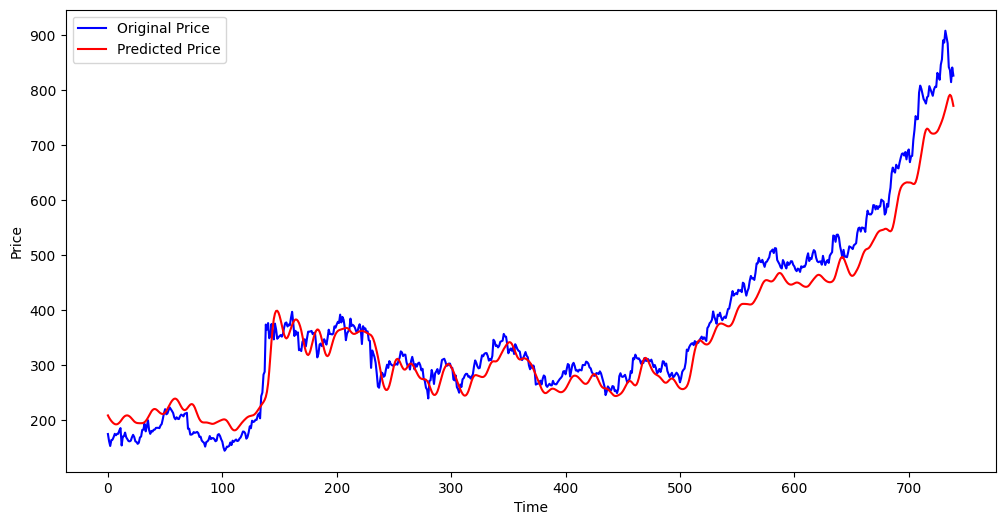

In [ ]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label="Original Price")
plt.plot(y_predicted, 'r', label="Predicted Price")
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()